 ## <span style='background :yellow' > Use regression analysis to predict vehicle performance (mileage i.e kilometre travelled per litre) </span>

#### Importing a Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

#### Import Dataset

In [2]:
data=pd.read_csv('C:/Users/Digital/Desktop/Imarticus/new/Vehicle Performance Prediction/Dataset/data.csv')

In [3]:
# Visualize first Five Columns
data.head() 

,origin,cylinders,displacement,horsepower,weight,acceleration,year,name,Kilometer_per_liter
0,1,8,307.0,130,3504,12.0,1970,chevrolet chevelle malibu,7.652587
1,1,8,350.0,165,3693,11.5,1970,buick skylark 320,6.377156
2,1,8,318.0,150,3436,11.0,1970,plymouth satellite,7.652587
3,1,8,304.0,150,3433,12.0,1970,amc rebel sst,6.802299
4,1,8,302.0,140,3449,10.5,1970,ford torino,7.227443


In [4]:
# Visualize Last Five Columns
data.tail()

,origin,cylinders,displacement,horsepower,weight,acceleration,year,name,Kilometer_per_liter
393,1,4,140.0,86,2790,15.6,1982,ford mustang gl,11.478880
394,2,4,97.0,52,2130,24.6,1982,vw pickup,18.706323
395,1,4,135.0,84,2295,11.6,1982,dodge rampage,13.604599
396,1,4,120.0,79,2625,18.6,1982,ford ranger,11.904024
397,1,4,119.0,82,2720,19.4,1982,chevy s-10,13.179455


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   origin               398 non-null    int64  
 1   cylinders            398 non-null    int64  
 2   displacement         398 non-null    float64
 3   horsepower           398 non-null    object 
 4   weight               398 non-null    int64  
 5   acceleration         398 non-null    float64
 6   year                 398 non-null    int64  
 7   name                 398 non-null    object 
 8   Kilometer_per_liter  398 non-null    float64
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


#### Describe Statistical Summary

In [6]:
data.describe()

,origin,cylinders,displacement,weight,acceleration,year,Kilometer_per_liter
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,1.572864,5.454774,193.425879,2970.424623,15.568090,1976.010050,9.997073
std,0.802055,1.701004,104.269838,846.841774,2.757689,3.697627,3.322917
min,1.000000,3.000000,68.000000,1613.000000,8.000000,1970.000000,3.826293
25%,1.000000,4.000000,104.250000,2223.750000,13.825000,1973.000000,7.440015
50%,1.000000,4.000000,148.500000,2803.500000,15.500000,1976.000000,9.778305
75%,2.000000,8.000000,262.000000,3608.000000,17.175000,1979.000000,12.329168
max,3.000000,8.000000,455.000000,5140.000000,24.800000,1982.000000,19.811697


#### Correlation between all the Features

In [7]:
data.corr()

,origin,cylinders,displacement,weight,acceleration,year,Kilometer_per_liter
origin,1.000000,-0.562543,-0.609409,-0.581024,0.205873,0.180662,0.563450
cylinders,-0.562543,1.000000,0.950721,0.896017,-0.505419,-0.348746,-0.775396
displacement,-0.609409,0.950721,1.000000,0.932824,-0.543684,-0.370164,-0.804203
weight,-0.581024,0.896017,0.932824,1.000000,-0.417457,-0.306564,-0.831741
acceleration,0.205873,-0.505419,-0.543684,-0.417457,1.000000,0.288137,0.420289
year,0.180662,-0.348746,-0.370164,-0.306564,0.288137,1.000000,0.579267
Kilometer_per_liter,0.563450,-0.775396,-0.804203,-0.831741,0.420289,0.579267,1.000000


#### There is High -ve Correlation between cylinders,displacement,weight variable on mileage.

<AxesSubplot:>

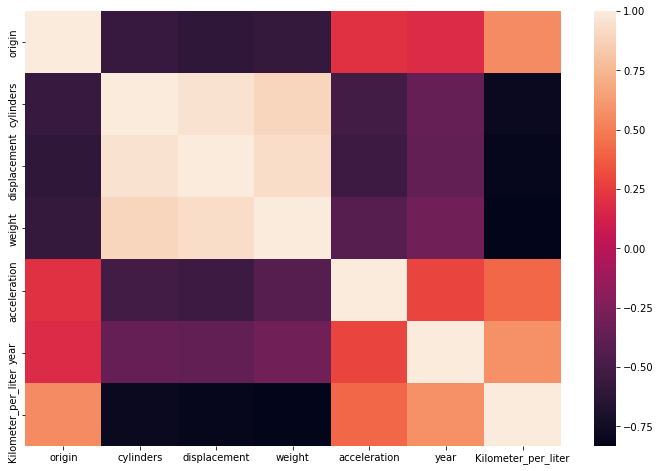

In [8]:
plt.subplots(figsize=[12,8])
sns.heatmap(data.corr())

### Check for Null Values

In [9]:
data.isna().sum()

origin                 0
cylinders              0
displacement           0
horsepower             0
weight                 0
acceleration           0
year                   0
name                   0
Kilometer_per_liter    0
dtype: int64

In [10]:
# Replace ? with Nan Values
data.replace('?',np.nan,inplace=True) 

In [11]:
data.isna().sum()

origin                 0
cylinders              0
displacement           0
horsepower             6
weight                 0
acceleration           0
year                   0
name                   0
Kilometer_per_liter    0
dtype: int64

In [12]:
# Change Datatype Of Horsepower to Numeric
data['horsepower']=pd.to_numeric(data['horsepower'])

In [13]:
data['horsepower'].mean()

104.46938775510205

In [14]:
avg=data['horsepower'].median()
avg

93.5

In [15]:
# Replace Null values with median
data['horsepower'] = data['horsepower'].fillna(avg)

In [16]:
data.isna().sum()

origin                 0
cylinders              0
displacement           0
horsepower             0
weight                 0
acceleration           0
year                   0
name                   0
Kilometer_per_liter    0
dtype: int64

#### There is No Null values in our data

### Data Analysis

In [17]:
data.corr()

,origin,cylinders,displacement,horsepower,weight,acceleration,year,Kilometer_per_liter
origin,1.000000,-0.562543,-0.609409,-0.452096,-0.581024,0.205873,0.180662,0.563450
cylinders,-0.562543,1.000000,0.950721,0.841284,0.896017,-0.505419,-0.348746,-0.775396
displacement,-0.609409,0.950721,1.000000,0.895778,0.932824,-0.543684,-0.370164,-0.804203
horsepower,-0.452096,0.841284,0.895778,1.000000,0.862442,-0.686590,-0.413733,-0.773453
weight,-0.581024,0.896017,0.932824,0.862442,1.000000,-0.417457,-0.306564,-0.831741
acceleration,0.205873,-0.505419,-0.543684,-0.686590,-0.417457,1.000000,0.288137,0.420289
year,0.180662,-0.348746,-0.370164,-0.413733,-0.306564,0.288137,1.000000,0.579267
Kilometer_per_liter,0.563450,-0.775396,-0.804203,-0.773453,-0.831741,0.420289,0.579267,1.000000


In [18]:
print('Find most important features releative to the target')
corr=data.corr()
corr.sort_values(['Kilometer_per_liter'],ascending = False,inplace=True)
corr.Kilometer_per_liter

Find most important features releative to the target


Kilometer_per_liter    1.000000
year                   0.579267
origin                 0.563450
acceleration           0.420289
horsepower            -0.773453
cylinders             -0.775396
displacement          -0.804203
weight                -0.831741
Name: Kilometer_per_liter, dtype: float64

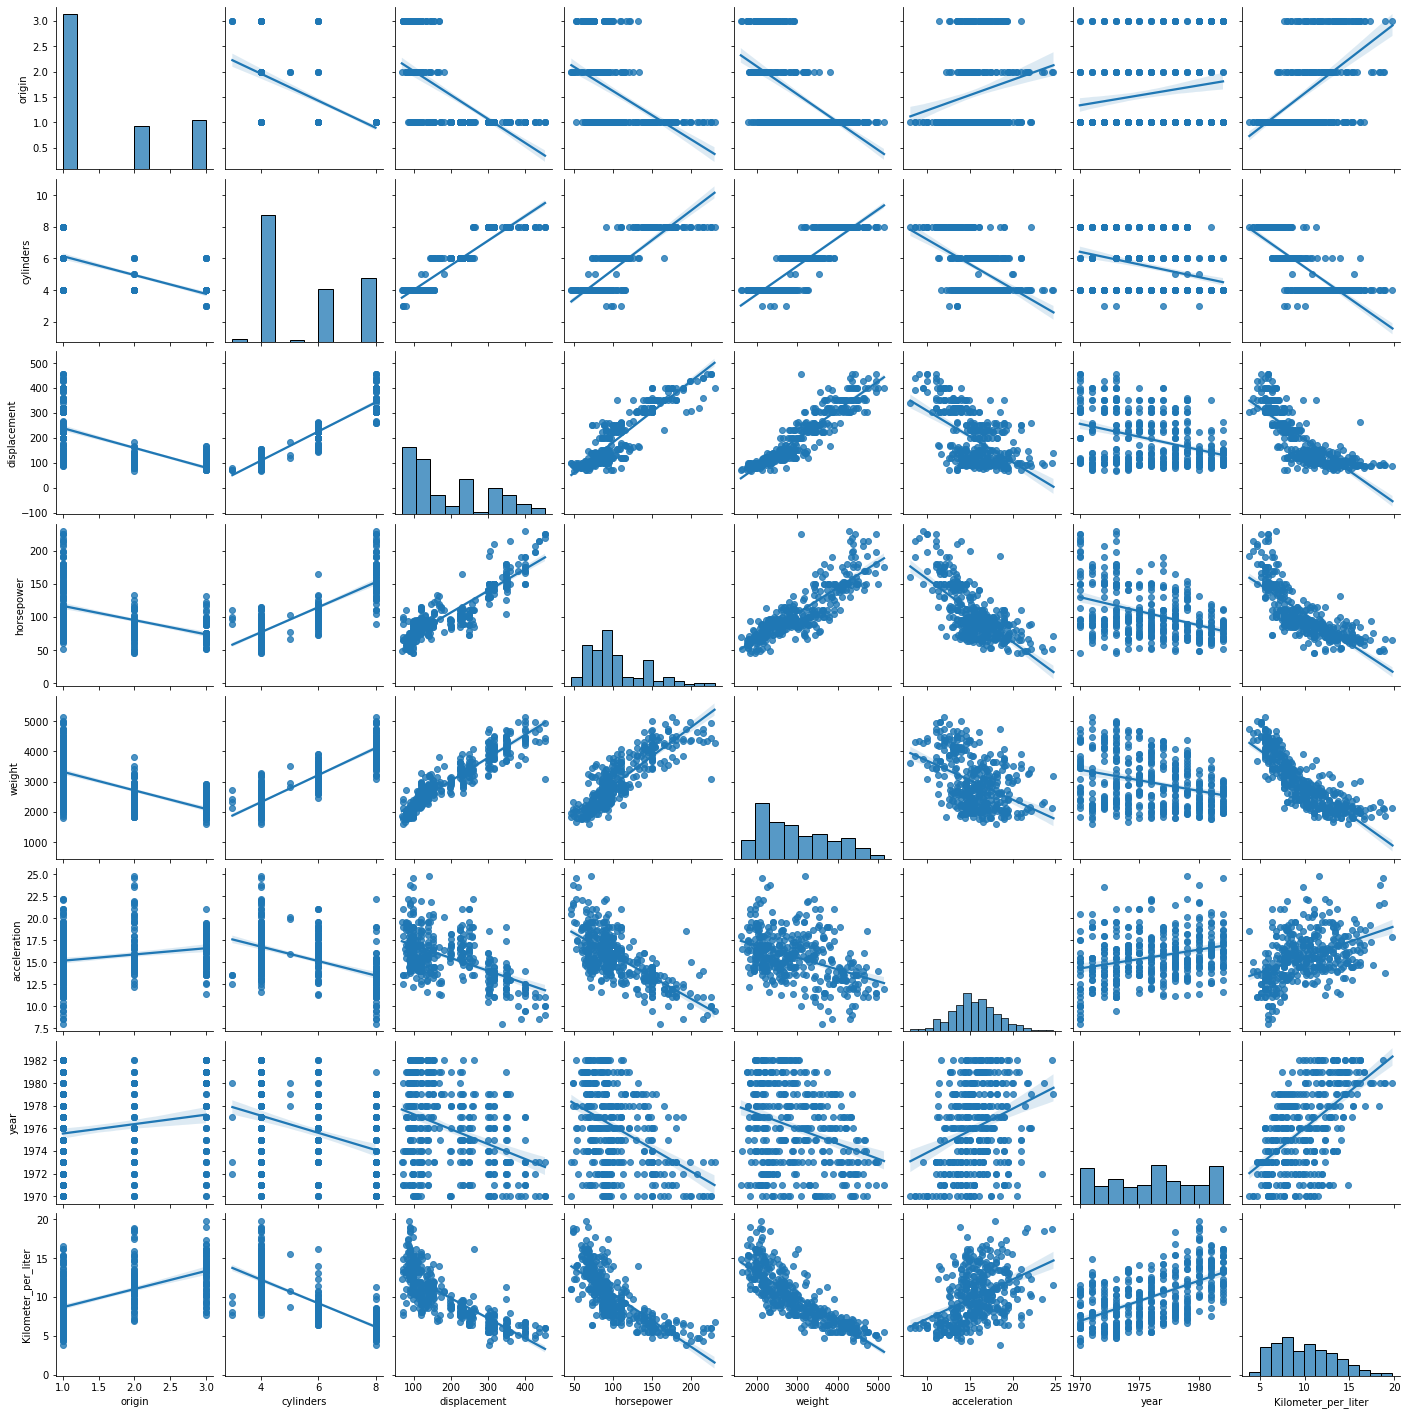

In [19]:
sns.pairplot(data=data,kind='reg')

In [20]:
# correlation between independent variable
a=data[['cylinders','displacement','horsepower','weight']].corr()
a

,cylinders,displacement,horsepower,weight
cylinders,1.000000,0.950721,0.841284,0.896017
displacement,0.950721,1.000000,0.895778,0.932824
horsepower,0.841284,0.895778,1.000000,0.862442
weight,0.896017,0.932824,0.862442,1.000000


<AxesSubplot:xlabel='horsepower', ylabel='Kilometer_per_liter'>

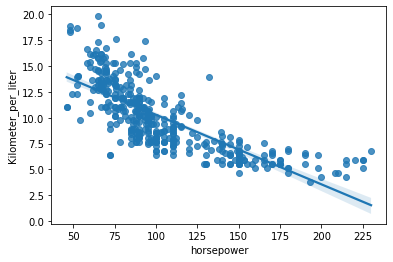

In [21]:
sns.regplot(x='horsepower',y='Kilometer_per_liter',data=data)

<AxesSubplot:xlabel='horsepower'>

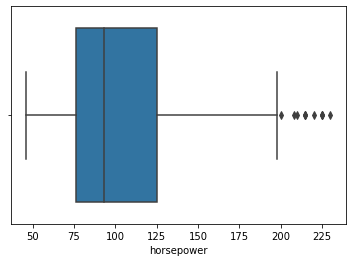

In [22]:
sns.boxplot(data.horsepower)

<AxesSubplot:xlabel='weight'>

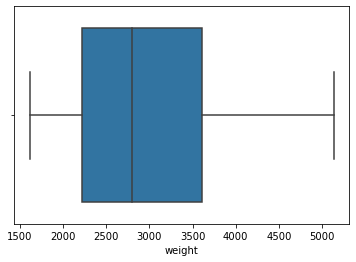

In [23]:
sns.boxplot(data.weight)

<AxesSubplot:xlabel='Kilometer_per_liter', ylabel='weight'>

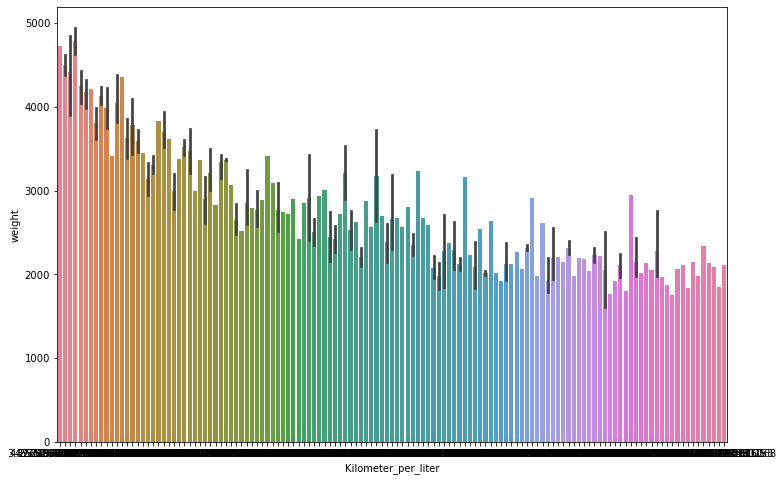

In [24]:
plt.subplots(figsize=[12,8])
sns.barplot(data.Kilometer_per_liter,data.weight,palette="husl")


<AxesSubplot:xlabel='Kilometer_per_liter', ylabel='Density'>

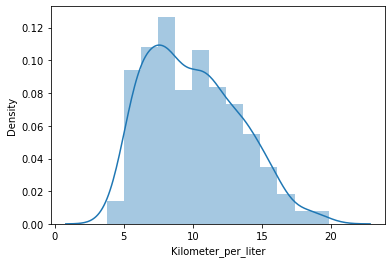

In [25]:
sns.distplot(data.Kilometer_per_liter)

#### There is some Left skewness in our Target Variable.we use log function to convert into normal distribution.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

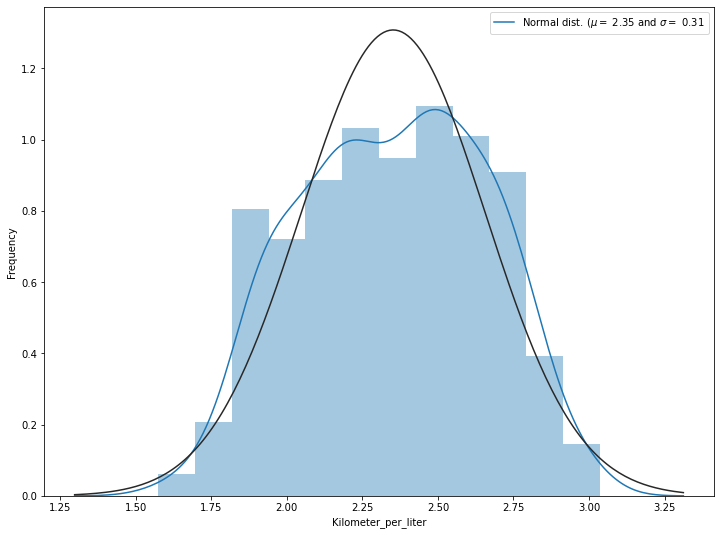

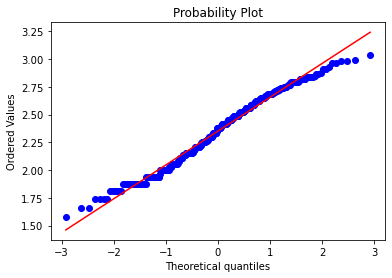

In [26]:
# we use log which is a part of numpy library
data['Kilometer_per_liter']=np.log1p(data['Kilometer_per_liter']) # 1p for real data

plt.subplots(figsize=(12,9))
sns.distplot(data['Kilometer_per_liter'],fit=stats.norm)
# get the fitted parameter used by function
(mu,sigma)=stats.norm.fit(data['Kilometer_per_liter'])

# plot with the distribution
plt.legend(['Normal dist. ($\mu= $ {:.2f} and $\sigma= $ {:.2f}'.format(mu,sigma)],loc='best')
plt.ylabel('Frequency')

# probability plot
fig=plt.figure()
stats.probplot(data['Kilometer_per_liter'],plot=plt)
plt.show()

In [27]:
data.head()

,origin,cylinders,displacement,horsepower,weight,acceleration,year,name,Kilometer_per_liter
0,1,8,307.0,130.0,3504,12.0,1970,chevrolet chevelle malibu,2.157858
1,1,8,350.0,165.0,3693,11.5,1970,buick skylark 320,1.998388
2,1,8,318.0,150.0,3436,11.0,1970,plymouth satellite,2.157858
3,1,8,304.0,150.0,3433,12.0,1970,amc rebel sst,2.054418
4,1,8,302.0,140.0,3449,10.5,1970,ford torino,2.107475


In [28]:
# there is no effect of name & origin feature on our target variable so drop it.
data.drop(['origin','name'],axis=1,inplace=True)

In [29]:
data.head()

,cylinders,displacement,horsepower,weight,acceleration,year,Kilometer_per_liter
0,8,307.0,130.0,3504,12.0,1970,2.157858
1,8,350.0,165.0,3693,11.5,1970,1.998388
2,8,318.0,150.0,3436,11.0,1970,2.157858
3,8,304.0,150.0,3433,12.0,1970,2.054418
4,8,302.0,140.0,3449,10.5,1970,2.107475


In [30]:
X=data.drop('Kilometer_per_liter',axis=1)
y=data['Kilometer_per_liter']

In [31]:
# split data into train and test  format
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=100)

In [32]:
model=LinearRegression()

<IPython.core.display.Javascript object>

In [33]:
model.fit(X_train,y_train)

LinearRegression()

In [34]:
# score/Accuracy
print('Accuracy',model.score(X_test,y_test)*100)
print('Accuracy',model.score(X_train,y_train)*100)

Accuracy 88.11827405041984
Accuracy 86.51828072821812


In [35]:
print('intercept of the regression is: ',model.intercept_)
print('coeff of  is:',model.coef_)

intercept of the regression is:  -51.46058285010346
coeff of  is: [-0.02069649  0.00027585 -0.00068491 -0.00024451  0.00014271  0.02766456]


In [36]:
y_pred_test=model.predict(X_test)

In [37]:
from sklearn.metrics import r2_score,mean_squared_error

In [38]:
print('R squared using linear regression:',r2_score(y_test,y_pred_test))
print('Mean squared error using linear regression:',mean_squared_error(y_test,y_pred_test))
print('Root mean squared error using linear regression:',np.sqrt(mean_squared_error(y_test,y_pred_test)))

R squared using linear regression: 0.8811827405041984
Mean squared error using linear regression: 0.011137586331571109
Root mean squared error using linear regression: 0.10553476361640797


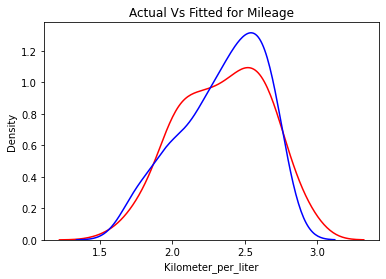

In [39]:
# distribution plot to compare actual vs predicted values of Mileage
ax1=sns.distplot(y_test,hist=False,color='r',label='Actual values')
sns.distplot(y_pred_test,hist=False,color='b',label='Fitted Values',ax=ax1)
plt.title('Actual Vs Fitted for Mileage')
plt.show()

In [40]:
from sklearn.model_selection import cross_val_score

In [41]:
Rcross=cross_val_score(model,X,y,cv=4)

In [42]:
Rcross

array([0.71970856, 0.75126055, 0.79564022, 0.13748249])

### Feature scaling for standardize a model.

In [43]:
from sklearn.preprocessing import StandardScaler

In [44]:
scale=StandardScaler()

In [45]:
X_std=scale.fit_transform(X)

In [46]:
x_train_s,x_test_s,y_train_s,y_test_s=train_test_split(X_std,y,test_size=0.3,random_state=100)

In [47]:
model_sc=model.fit(x_train_s,y_train_s)

In [48]:
y_pred_s=model.predict(x_test_s)

In [49]:
print('R squared using standardization:',r2_score(y_test_s,y_pred_s))
print('Mean squared error using standardization:',mean_squared_error(y_test_s,y_pred_s))
print('Root mean squared error using standardization:',np.sqrt(mean_squared_error(y_test_s,y_pred_s)))


R squared using standardization: 0.881182740504198
Mean squared error using standardization: 0.011137586331571149
Root mean squared error using standardization: 0.10553476361640816


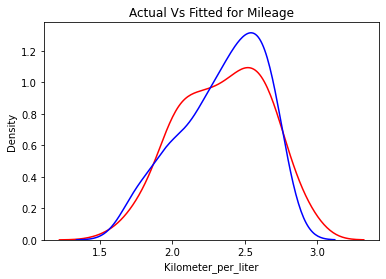

In [50]:
# distribution plot to compare actual vs predicted values of Mileage
ax1=sns.distplot(y_test_s,hist=False,color='r',label='Actual values')
sns.distplot(y_pred_s,hist=False,color='b',label='Fitted Values',ax=ax1)
plt.title('Actual Vs Fitted for Mileage')
plt.show()

### Model Improvement by using Polynomial Regression

In [51]:
from sklearn.preprocessing import PolynomialFeatures

In [52]:
pr=PolynomialFeatures(degree=2)


In [53]:
x_pr=pr.fit_transform(X_std)

In [54]:
lm_x_pr=model.fit(x_pr,y)

In [55]:
yhat_x_pr=model.predict(x_pr)

In [56]:
print('R squared using polynomial regression:',r2_score(y,yhat_x_pr))
print('Mean squared error using polynomial regression:',mean_squared_error(y,yhat_x_pr))
print('Root mean squared error using polynomial regression:',np.sqrt(mean_squared_error(y,yhat_x_pr)))


R squared using polynomial regression: 0.9077660941528276
Mean squared error using polynomial regression: 0.008587332826156565
Root mean squared error using polynomial regression: 0.09266786296314686


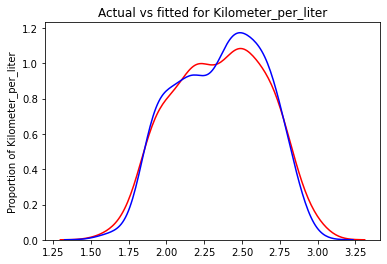

In [57]:
# distribution plot to compare actual vs predicted values for price
ax1=sns.distplot(y,hist=False,color='r',label='Actual VAlues')
sns.distplot(yhat_x_pr,hist=False,color='b',label='Fitted values',ax=ax1)
plt.title('Actual vs fitted for Kilometer_per_liter')
plt.xlabel('')
plt.ylabel('Proportion of Kilometer_per_liter')
plt.show()

In [58]:
# cross validation
Rcross=cross_val_score(lm_x_pr,x_pr,y,cv=4)

In [59]:
Rcross

array([-0.26522146,  0.36601469,  0.85806845, -2.60599216])

## Ridge regression

In [60]:
x_train2,x_test2,y_train2,y_test2=train_test_split(x_pr,y,test_size=0.3,random_state=1)

In [61]:
from sklearn.linear_model import Ridge

In [62]:
RidgeModel2=Ridge(alpha=100)

In [63]:
RidgeModel2.fit(x_train2,y_train2)

Ridge(alpha=100)

In [64]:
Rcross2=cross_val_score(RidgeModel2,x_pr,y,cv=4)

In [65]:
Rcross2

array([ 0.71620024,  0.79952435,  0.8210364 , -0.56958293])

In [66]:
yhat_Ridge=RidgeModel2.predict(x_test2)

In [67]:
print('Predicted',yhat_Ridge[0:4])

Predicted [2.29912576 2.52809139 2.10163593 2.41571283]


In [68]:
print('actual',y_test2[0:4])

actual 174    2.157858
359    2.560828
250    2.224384
274    2.264927
Name: Kilometer_per_liter, dtype: float64


## Gridsearch 

In [69]:
from sklearn.model_selection import GridSearchCV

In [70]:
parameters1=[{'alpha':[0.001,0.1,1,10,100,1000,10000,100000]}]

In [71]:
RR=Ridge()

In [72]:
Grid1=GridSearchCV(RR,parameters1,cv=4)

In [73]:
Grid1.fit(X_std,y)

GridSearchCV(cv=4, estimator=Ridge(),
             param_grid=[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000,
                                    100000]}])

In [74]:
BestRR=Grid1.best_estimator_

In [75]:
BestRR

Ridge(alpha=0.001)

In [76]:
BestRR.score(x_test_s,y_test_s)

0.8819359529979718

## Gradient Descent

In [77]:
# split data into train and test  format
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=7)

In [78]:
columnNames=data.columns
columnNames

Index(['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration',
       'year', 'Kilometer_per_liter'],
      dtype='object')

In [79]:
X_train.shape

(318, 6)

In [80]:
X_te.shape

NameError: name 'X_te' is not defined

In [ ]:
X_std.shape

In [ ]:
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler

In [ ]:
X_std=StandardScaler().fit_transform(X_train)
X=pd.DataFrame(X_std,columns=X.columns)
Y=y_train


X_test_std=StandardScaler().fit_transform(X_test)
X_te=pd.DataFrame(X_test_std,columns=X.columns)
Y_te=y_test

clf=SGDRegressor(shuffle=False,learning_rate='invscaling',max_iter=2500)
clf.fit(X,Y)

Y_pred=clf.predict(X_te)

print('Weight='+str(clf.coef_))
print('Y Intercept = '+str(clf.intercept_))

In [ ]:
d2={'True Labels':Y_te,'Predicted_Labels':Y_pred}
df2=pd.DataFrame(data=d2)
df2

In [ ]:
lm2=sns.lmplot(x='True Labels',y='Predicted_Labels',data=df2,size=10)

fig2=lm2.fig

# add a title to the fig
fig2.suptitle('with sklearn implementataion',fontsize=18)

sns.set(font_scale=105)

In [ ]:
clf.

### OLS

In [ ]:
import statsmodels.api as sm
X_train_sm=X_train
# unlike sklearn,statsmodels dont automatically fit a constant
# so you need to use a method sm.add_constant(x) in order to add a constant
X_train_sm=sm.add_constant(X_train_sm)
# create a fitted model in one line
lm_1=sm.OLS(y_train,X_train_sm).fit()

In [ ]:
# print the coeff
lm_1.params

In [ ]:
print(lm_1.summary())

## VIF

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [ ]:
# for each X,calculate VIF and save in dataframe
vif=pd.DataFrame()
vif['VIF Factor']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['features']=X.columns

In [ ]:
vif.round(2)

there is high multicollinearity in these four variables(cylinders,displacement,horsepower,weight)